In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/darsh/Desktop/Datasets/Group B/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# matplotlib.pyplot Visualization

In [4]:
import matplotlib.pyplot as plt

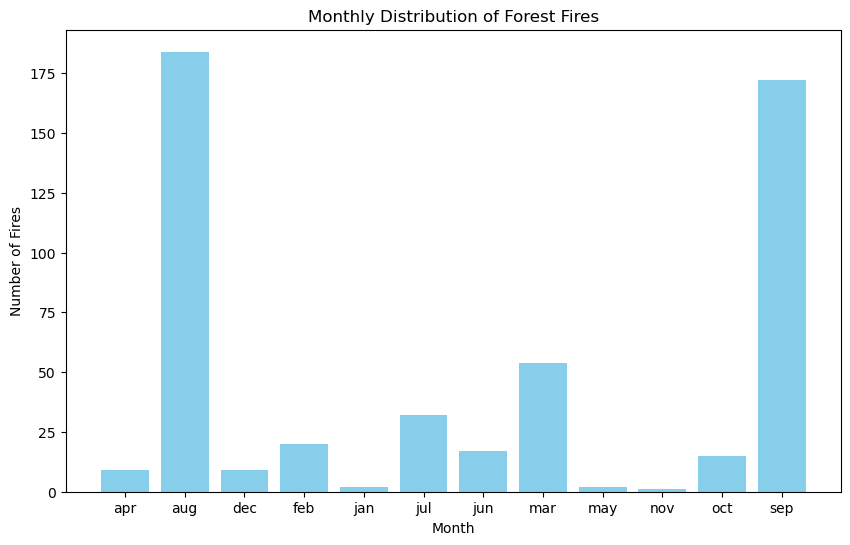

In [5]:
monthly_counts = df['month'].value_counts().sort_index()
months = monthly_counts.index
counts = monthly_counts.values

plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')
plt.title('Monthly Distribution of Forest Fires')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

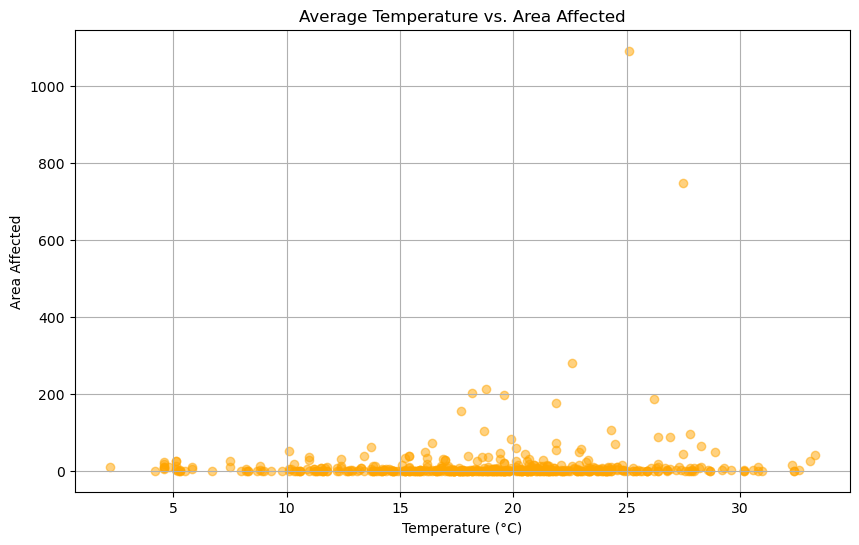

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['area'], color='orange', alpha=0.5)
plt.title('Average Temperature vs. Area Affected')
plt.xlabel('Temperature (°C)')
plt.ylabel('Area Affected')
plt.grid(True)
plt.show()

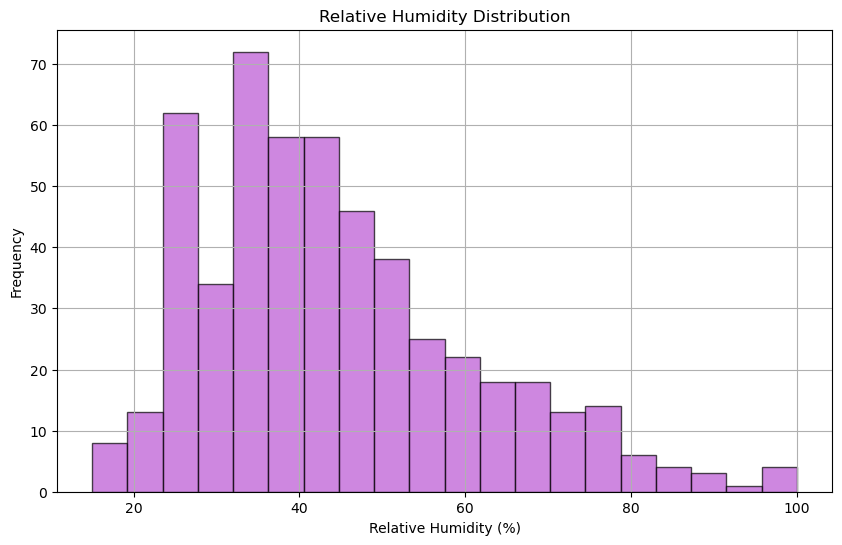

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['RH'], bins=20, color='mediumorchid', edgecolor='black', alpha=0.7)
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

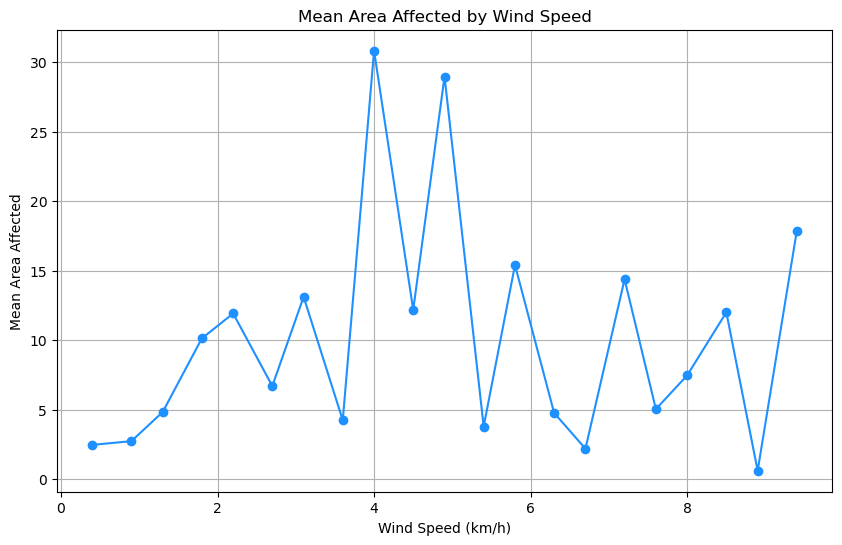

In [8]:
# Calculate the mean area affected for each wind speed
mean_area_by_wind = df.groupby('wind')['area'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_area_by_wind.index, mean_area_by_wind.values, color='dodgerblue', marker='o')
plt.title('Mean Area Affected by Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Mean Area Affected')
plt.grid(True)
plt.show()

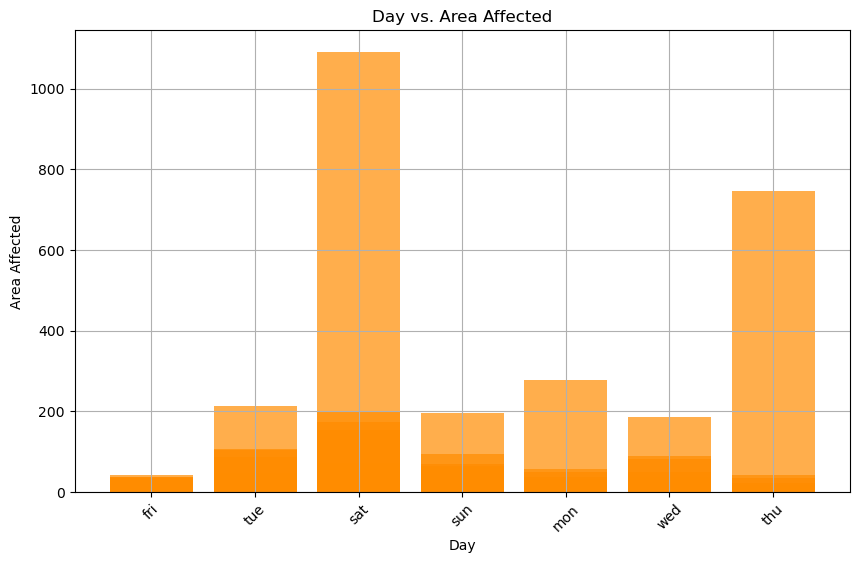

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(df['day'], df['area'], color='darkorange', alpha=0.7)
plt.title('Day vs. Area Affected')
plt.xlabel('Day')
plt.ylabel('Area Affected')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

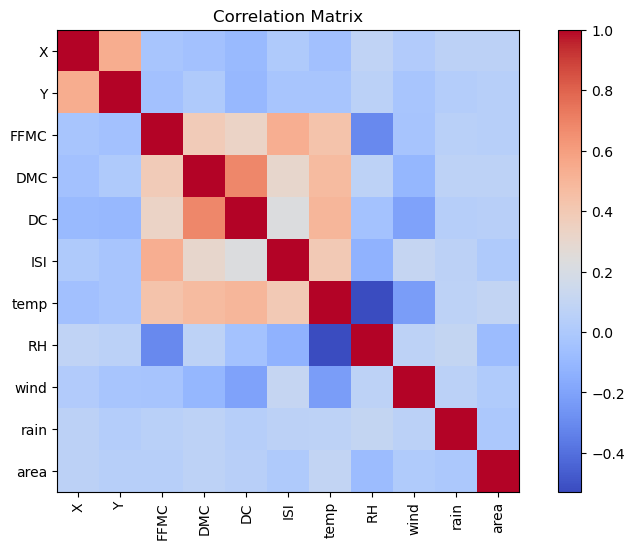

In [10]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
plt.imshow(numeric_df.corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(numeric_df.columns)), numeric_df.columns, rotation=90)
plt.yticks(range(len(numeric_df.columns)), numeric_df.columns)
plt.show()

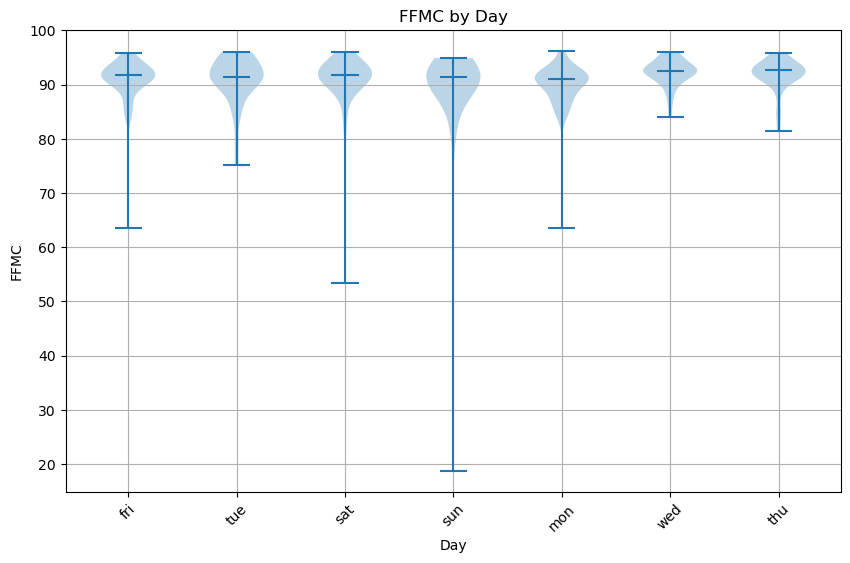

In [11]:
plt.figure(figsize=(10, 6))
data = [df[df['day'] == day]['FFMC'] for day in df['day'].unique()]
plt.violinplot(data, showmeans=False, showmedians=True)
plt.title('FFMC by Day')
plt.xlabel('Day')
plt.ylabel('FFMC')
plt.xticks(range(1, len(df['day'].unique()) + 1), df['day'].unique(), rotation=45)
plt.grid(True)
plt.show()

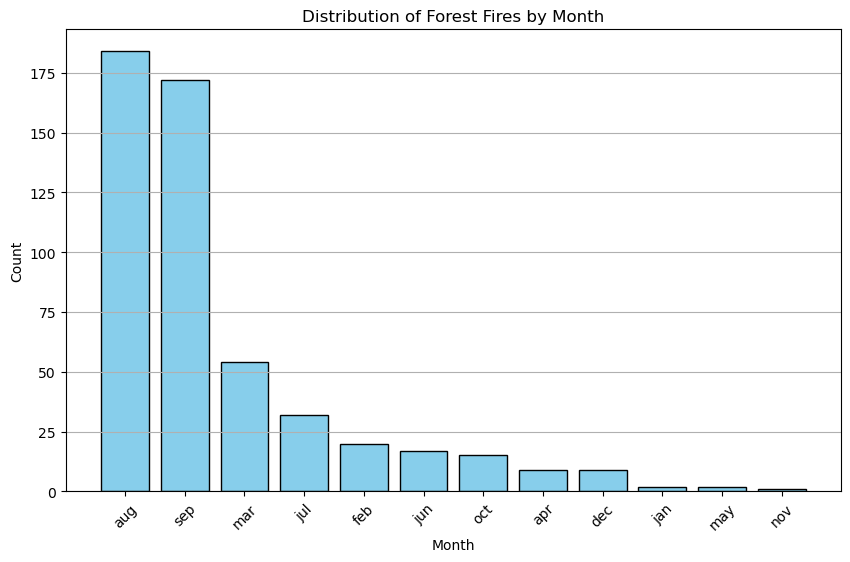

In [12]:
plt.figure(figsize=(10, 6))
counts = df['month'].value_counts()
months = counts.index
plt.bar(months, counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

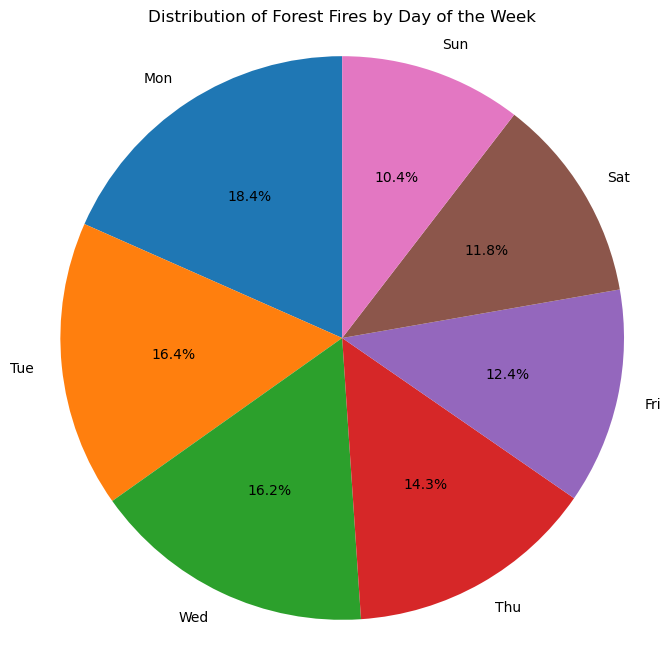

In [15]:
plt.figure(figsize=(8, 8))
counts = df['day'].value_counts()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  
colors = plt.cm.tab10.colors  
plt.pie(counts, labels=days, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Forest Fires by Day of the Week')
plt.axis('equal')  
plt.show()

# seaborn Visualization

In [16]:
import seaborn as sns

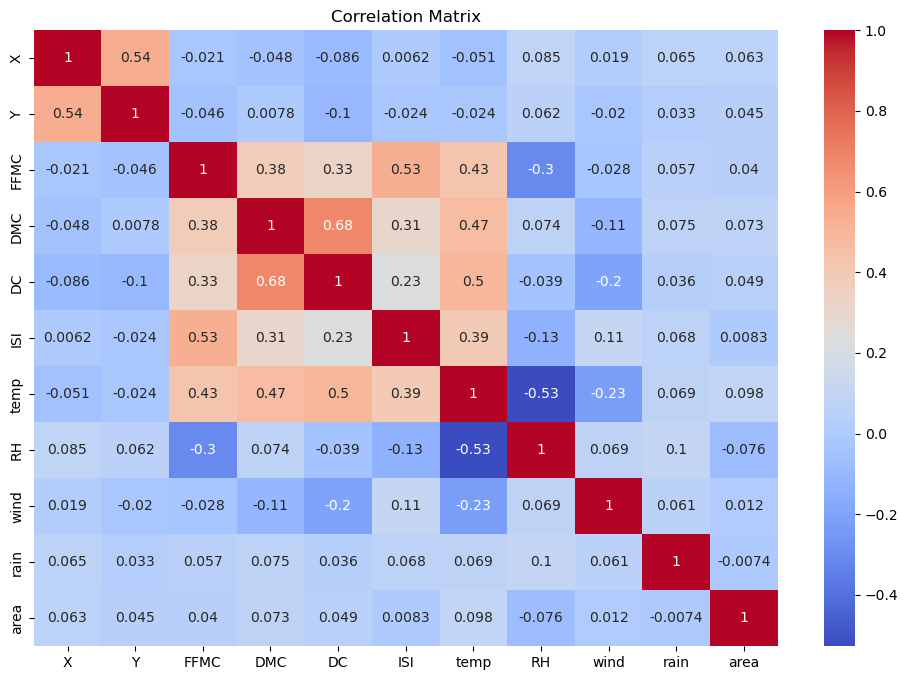

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

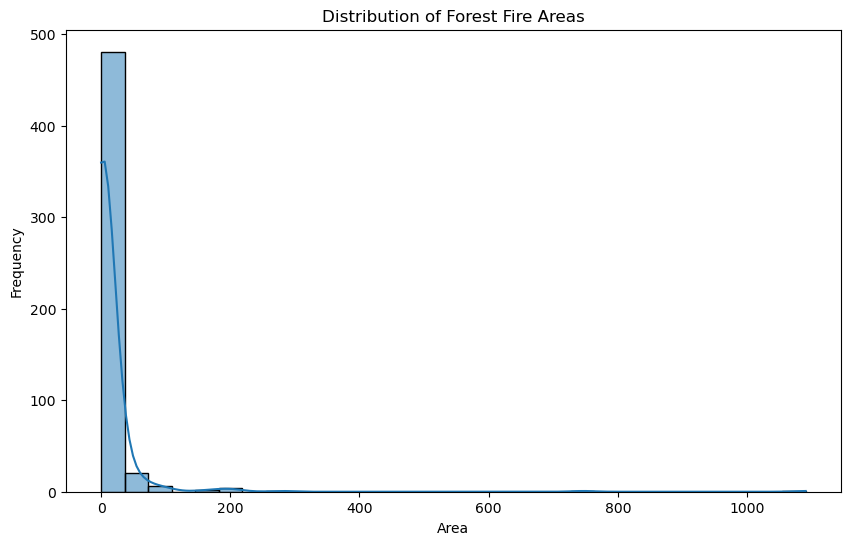

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Forest Fire Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

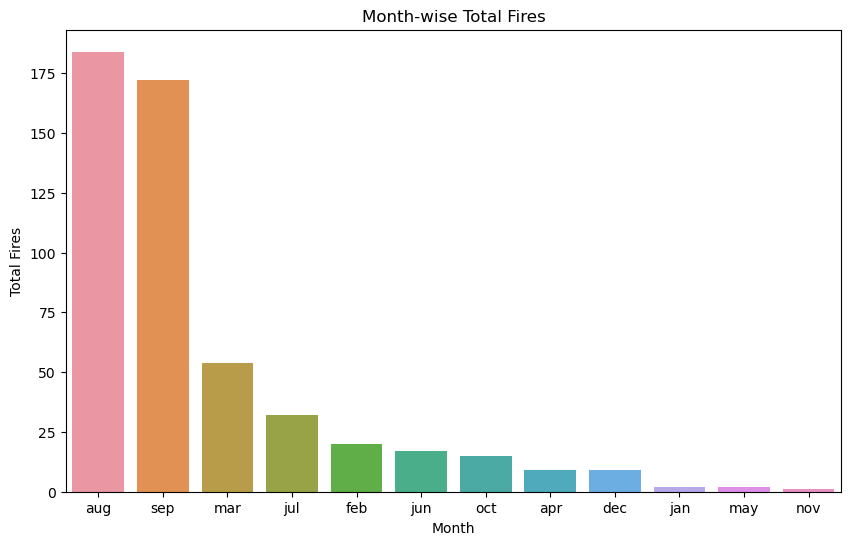

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, order=df['month'].value_counts().index)
plt.title('Month-wise Total Fires')
plt.xlabel('Month')
plt.ylabel('Total Fires')
plt.show()

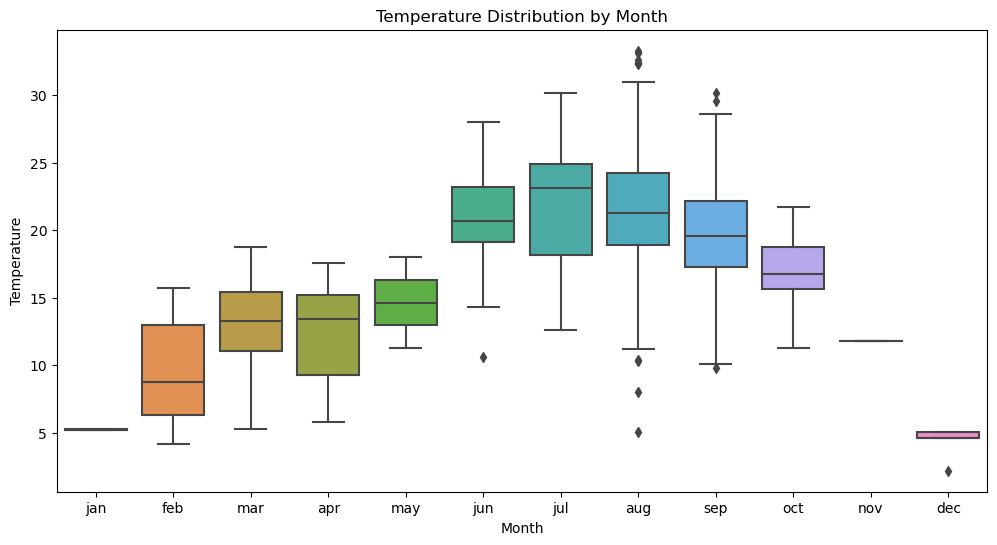

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temp', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

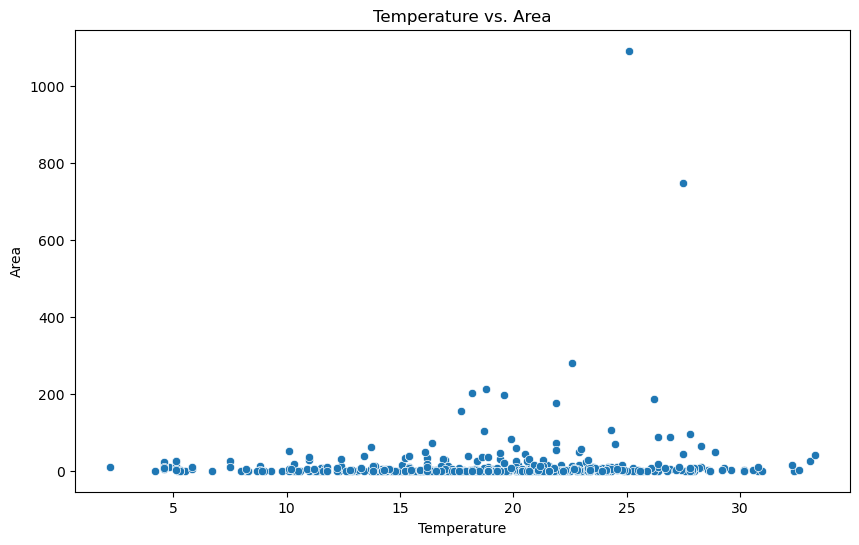

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='area', data=df)
plt.title('Temperature vs. Area')
plt.xlabel('Temperature')
plt.ylabel('Area')
plt.show()

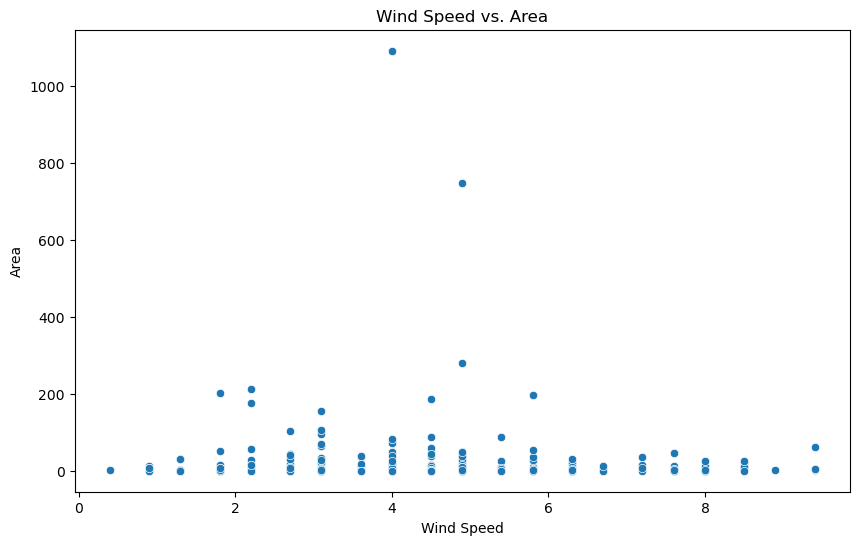

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind', y='area', data=df)
plt.title('Wind Speed vs. Area')
plt.xlabel('Wind Speed')
plt.ylabel('Area')
plt.show()

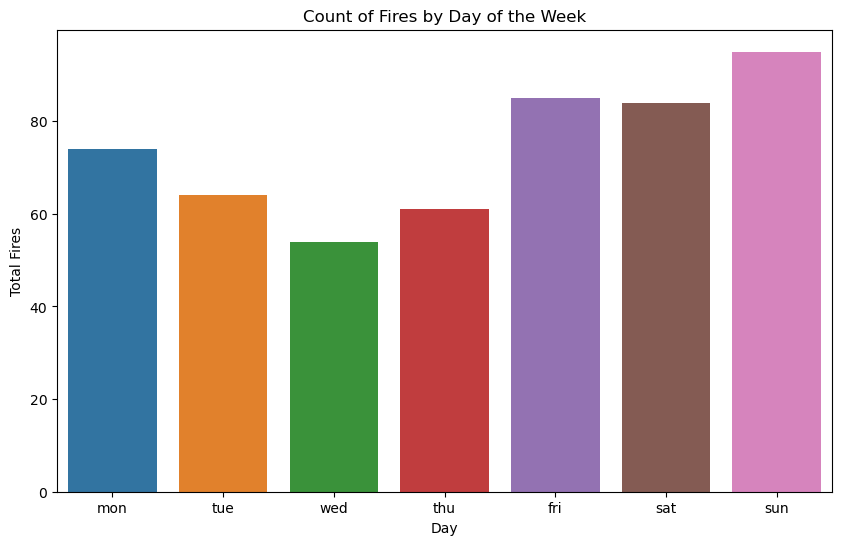

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=df, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title('Count of Fires by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Fires')
plt.show()

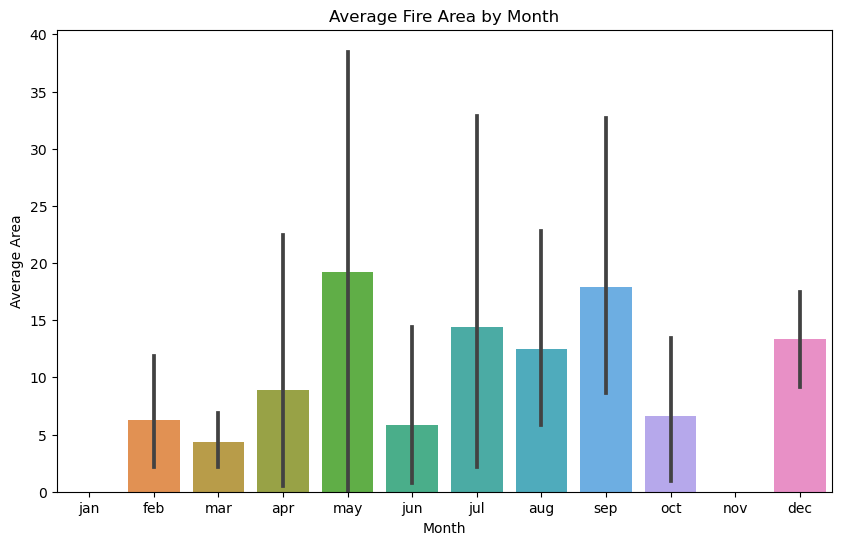

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='area', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Average Fire Area by Month')
plt.xlabel('Month')
plt.ylabel('Average Area')
plt.show()

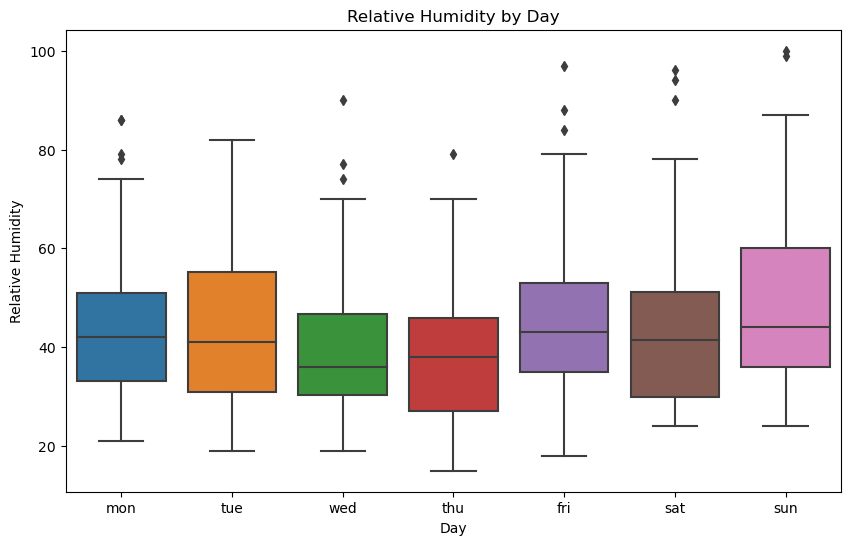

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='RH', data=df, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title('Relative Humidity by Day')
plt.xlabel('Day')
plt.ylabel('Relative Humidity')
plt.show()

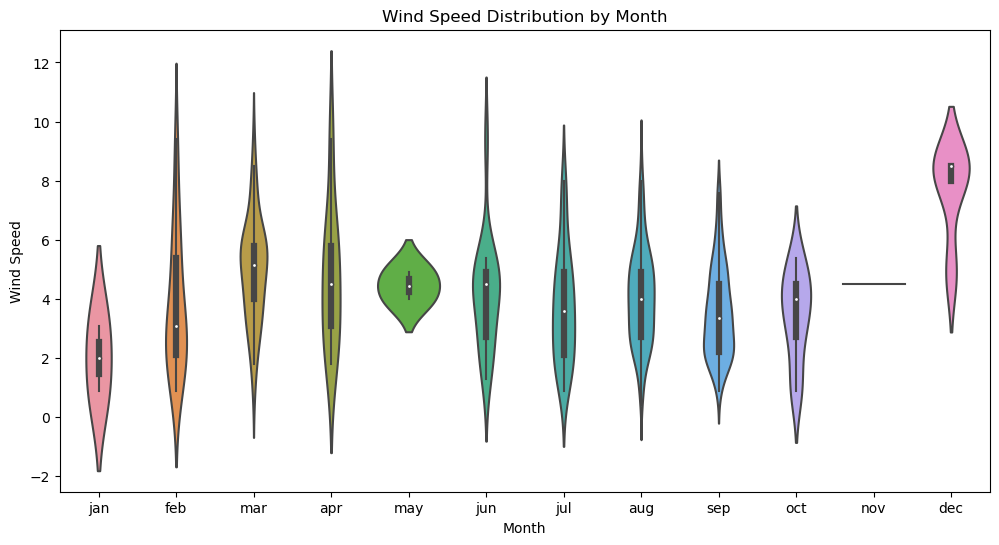

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='wind', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Wind Speed Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.show()

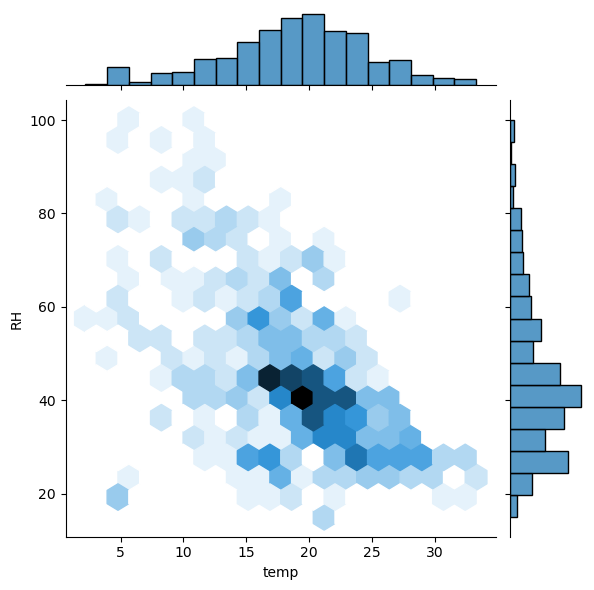

In [32]:
sns.jointplot(x='temp', y='RH', data=df, kind='hex')
plt.show()

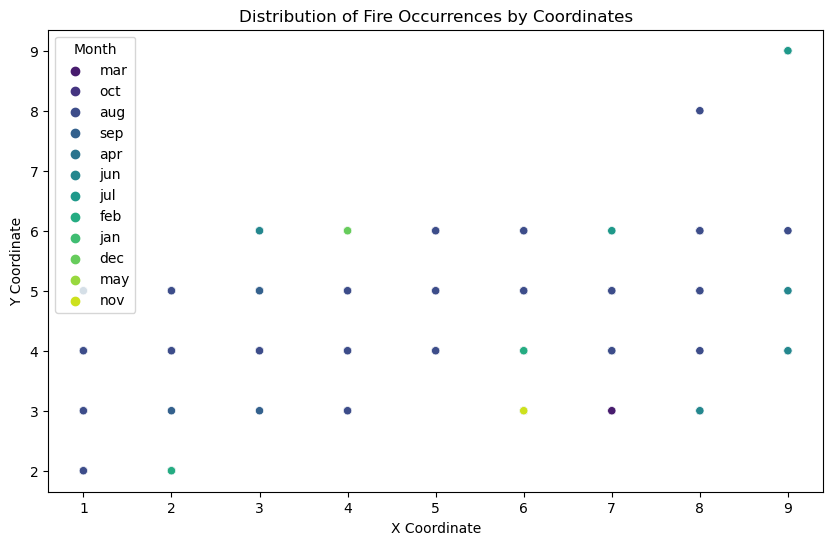

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df, hue='month', palette='viridis')
plt.title('Distribution of Fire Occurrences by Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Month')
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_14912\2140493008.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['area'], shade=True)


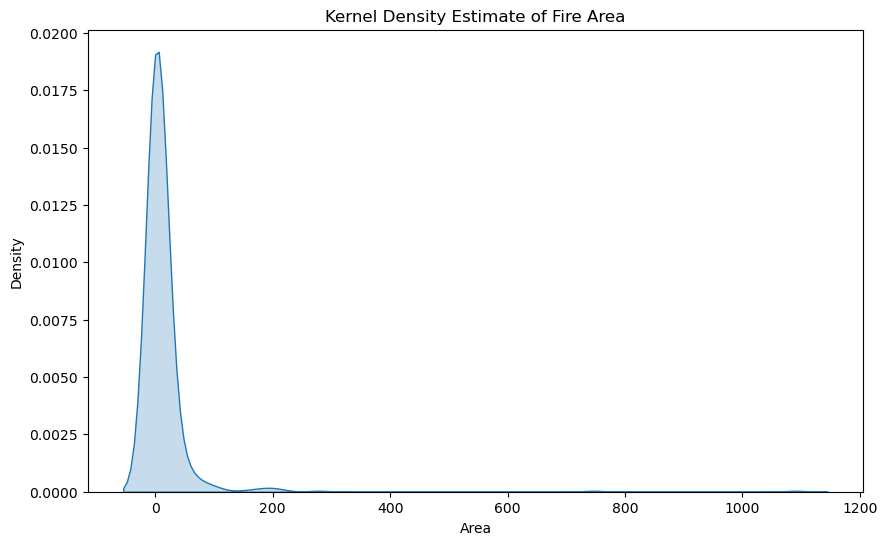

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['area'], shade=True)
plt.title('Kernel Density Estimate of Fire Area')
plt.xlabel('Area')
plt.show()